In [1]:
# !pip install sklearn
from IPython.display import clear_output

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *

2.4.0


In [2]:
data_x,data_y = load_iris(return_X_y=True)
print(data_x[0],data_y[0])
print(data_x[0].shape)
print(data_y.shape)

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
res=[]

[5.1 3.5 1.4 0.2] 0
(4,)
(150,)


In [3]:
x_1 = keras.Input(shape=(4,))
h1_1 = layers.Dense(6, activation='relu')(x_1)
h2_1 = layers.Dense(5, activation='relu')(h1_1)
h3_1 = layers.Dense(4, activation='sigmoid')(h2_1)
outputs = layers.Dense(3,activation='softmax')(h3_1)
nn_model = keras.Model(inputs=x_1, outputs=outputs,name='nn_network')
nn_model.summary()

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [4]:
nn_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
kf=KFold(n_splits=5,shuffle=True)
scce = tf.keras.losses.SparseCategoricalCrossentropy(
    reduction=tf.keras.losses.Reduction.NONE)
cce = tf.keras.losses.CategoricalCrossentropy()
nn_loss=0
loss=0
acc=0
res=[]
#---
nn_acc_score=0
nn_recall_marco_score=0
nn_recall_mirco_score=0
nn_precision_macro_score=0
nn_precision_micro_score=0
nn_confusion_matrix_sum=np.empty((3,3))
nn_confusion_matrix_sum[:]=0
#----
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    history = nn_model.fit(data_x,data_y,
              batch_size=1, epochs=25, verbose=0)
    res.append(history)
    y_pred=np.argmax(nn_model.predict(x_test),axis=1)
    tmp_lo,tmp_ac=nn_model.evaluate(x_test,y_test,verbose=1)
    loss+=tmp_lo
    acc+=tmp_ac
    nn_acc_score=nn_acc_score+accuracy_score(y_test,y_pred)
    nn_recall_marco_score=nn_recall_marco_score+recall_score(y_test, y_pred, average='macro')
    nn_recall_mirco_score=nn_recall_mirco_score+recall_score(y_test, y_pred, average='macro')
    nn_precision_macro_score=nn_precision_macro_score+precision_score(y_test, y_pred, average='macro')
    nn_precision_micro_score=nn_precision_micro_score+precision_score(y_test, y_pred, average='micro')
    nn_confusion_matrix_sum=nn_confusion_matrix_sum+confusion_matrix(y_test, y_pred)
    print("recall_marco_score:",recall_score(y_test, y_pred, average='macro'))
    print("recall_mirco_score:",recall_score(y_test, y_pred, average='macro'))
    print("precision_macro_score:",precision_score(y_test, y_pred, average='macro'))
    print("precision_micro_score:",precision_score(y_test, y_pred, average='macro'))
    print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
    # print(y_pred,y_test)
    # loss+=np.array(scce(y_pred,y_test))
    y_test=y_test.astype('float64')
    y_pred=y_pred.astype('float64')
    nn_loss=nn_loss+cce(y_pred,y_test).numpy()
    # print(los)
    # print(y_pred,y_test,)
print('-----------------------------------------')
print('loss_avg:',nn_loss/5)
print('model.evaluate loss:',loss/5, "model.evaluate accuracy:",acc/5)
print("accuracy_score:",nn_acc_score/5)
print("recall_marco_score_avg:",nn_recall_marco_score/5)
print("recall_mirco_score_avg:",nn_recall_mirco_score/5)
print("precision_macro_score_avg:",nn_precision_macro_score/5)
print("precision_micro_score_avg:",nn_precision_micro_score/5)
print("confusion_matrix_avg:\n",nn_confusion_matrix_sum/5)


1/1 [==============================] - 0s 145ms/step - loss: 0.2425 - accuracy: 0.9333
recall_marco_score: 0.9047619047619048
recall_mirco_score: 0.9047619047619048
precision_macro_score: 0.9487179487179488
precision_micro_score: 0.9487179487179488
confusion_matrix:
 [[12  0  0]
 [ 0  5  2]
 [ 0  0 11]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0881 - accuracy: 0.9667
recall_marco_score: 0.9666666666666667
recall_mirco_score: 0.9666666666666667
precision_macro_score: 0.9743589743589745
precision_micro_score: 0.9743589743589745
confusion_matrix:
 [[ 8  0  0]
 [ 0  9  1]
 [ 0  0 12]]
1/1 [==============================] - 0s 15ms/step - loss: 0.0439 - accuracy: 1.0000
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[ 6  0  0]
 [ 0 13  0]
 [ 0  0 11]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0307 - accuracy: 1.0000
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_mac

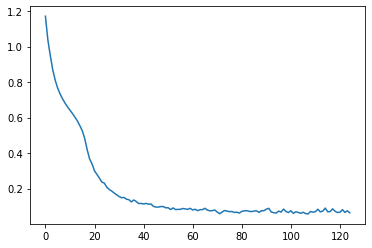

In [5]:
tmp=res
loss_pic=np.array([])
acc_pic=np.array([])
for i in tmp:
    loss_pic=np.append(loss_pic,np.array(i.history['loss']))
plt.plot(loss_pic)

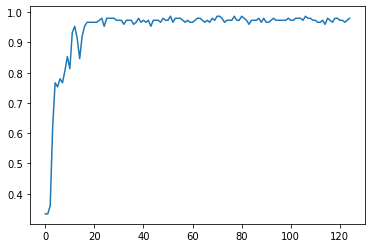

In [6]:
for i in tmp:
    acc_pic=np.append(acc_pic,np.array(i.history['accuracy']))
plt.plot(acc_pic)

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
kf=KFold(n_splits=5,shuffle=True)
loss_avg=0
acc_score=0
recall_marco_score=0
recall_mirco_score=0
precision_macro_score=0
precision_micro_score=0
confusion_matrix_sum=np.empty((3,3))
confusion_matrix_sum[:]=0
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    clf = LogisticRegression(random_state=0,multi_class="multinomial",max_iter=10000).fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    y_test=y_test.astype('float64')
    y_pred=y_pred.astype('float64')
    cce = tf.keras.losses.CategoricalCrossentropy()
    loss_avg=loss_avg+cce(y_pred,y_test).numpy()
    acc_score=acc_score+accuracy_score(y_test,y_pred)
    recall_marco_score=recall_marco_score+recall_score(y_test, y_pred, average='macro')
    recall_mirco_score=recall_mirco_score+recall_score(y_test, y_pred, average='macro')
    precision_macro_score=precision_macro_score+precision_score(y_test, y_pred, average='macro')
    precision_micro_score=precision_micro_score+precision_score(y_test, y_pred, average='micro')
    confusion_matrix_sum=confusion_matrix_sum+confusion_matrix(y_test, y_pred)
    print("recall_marco_score:",recall_score(y_test, y_pred, average='macro'))
    print("recall_mirco_score:",recall_score(y_test, y_pred, average='macro'))
    print("precision_macro_score:",precision_score(y_test, y_pred, average='macro'))
    print("precision_micro_score:",precision_score(y_test, y_pred, average='macro'))
    print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
    print('--------')
print('loss_avg:',loss_avg/5)
print("accuracy_score:",acc_score/5)
print("recall_marco_score_avg:",recall_marco_score/5)
print("recall_mirco_score_avg:",recall_mirco_score/5)
print("precision_macro_score_avg:",precision_macro_score/5)
print("precision_micro_score_avg:",precision_micro_score/5)
print("confusion_matrix_avg:\n",confusion_matrix_sum/5)

recall_marco_score: 0.9696969696969697
recall_mirco_score: 0.9696969696969697
precision_macro_score: 0.9629629629629629
precision_micro_score: 0.9629629629629629
confusion_matrix:
 [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
--------
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[ 6  0  0]
 [ 0  9  0]
 [ 0  0 15]]
--------
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
--------
recall_marco_score: 0.8910256410256411
recall_mirco_score: 0.8910256410256411
precision_macro_score: 0.9047619047619048
precision_micro_score: 0.9047619047619048
confusion_matrix:
 [[ 9  0  0]
 [ 0  6  2]
 [ 0  1 12]]
--------
recall_marco_score: 1.0
recall_mirco_score: 1.0
precision_macro_score: 1.0
precision_micro_score: 1.0
confusion_matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
--------
loss_avg: 90.18143463134766
accuracy_score: 0

pack vs nn
loss_avg 90.50125427246094 90.18143463134766
recall_marco_score_avg: 0.9742857142857144 0.9721445221445222
recall_mirco_score_avg: 0.9742857142857144 0.9721445221445222
precision_macro_score_avg: 0.9846153846153847 0.9735449735449734
precision_mirco_score_avg: 0.9800000000000001 0.9733333333333334
confusion_matrix_avg:
 [[10.   0.   0. ]
 [ 0.   9.4  0.6]
 [ 0.   0.  10. ]] 
vs [[10.   0.   0. ]
 [ 0.   9.4  0.6]
 [ 0.   0.2  9.8]]


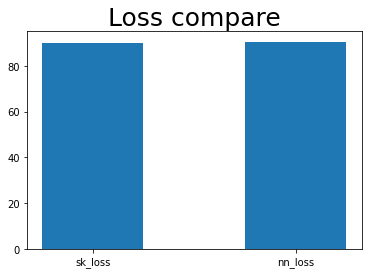

In [8]:

plt.title("Loss compare",fontsize=25,)
plt.bar(['sk_loss','nn_loss'],[loss_avg/5,nn_loss/5],width=0.5,)
print('pack vs nn')
print("loss_avg",nn_loss/5,loss_avg/5)
print("recall_marco_score_avg:",nn_recall_marco_score/5,recall_marco_score/5)
print("recall_mirco_score_avg:",nn_recall_mirco_score/5,recall_mirco_score/5)
print("precision_macro_score_avg:",nn_precision_macro_score/5,precision_macro_score/5)
print("precision_mirco_score_avg:",nn_precision_micro_score/5,precision_micro_score/5)
print("confusion_matrix_avg:\n",nn_confusion_matrix_sum/5,'\nvs',confusion_matrix_sum/5)